# Introduction - Graded Challenge 7

| **Nama**       | **Heru Ramadhan** |
|----------------|--------------------|
| **Batch**      | HCK - 018          |

**Background**
Kanker tulang adalah kondisi yang sangat serius, di mana deteksi dini sangat penting untuk keberhasilan pengobatan. Project ini bertujuan untuk mengembangkan model Artificial Neural Network (ANN) yang dapat memprediksi keberadaan kanker tulang melalui hasil X-ray, dengan fokus pada peningkatan recall agar model tidak melakukan salah deteksi terhadap kasus-kasus kanker yang sebenarnya ada.

**Problem Statement**
Tujuan project kali ini adalah untuk mengembangkan model yang mampu memprediksi keberadaan kanker tulang dari hasil X-ray dengan akurat. Model ini dirancang dengan fokus khusus pada recall, sehingga dapat meminimalkan kemungkinan kesalahan ketika pasien yang sebenarnya menderita kanker justru teridentifikasi sebagai sehat. Dengan begitu, risiko diagnosa yang terlewat bisa dikurangi, sehingga hasil pengobatan pasien dapat lebih ditingkatkan.

**Problem Statement Exploration**
1. Bagaimana Distribusi Klasifikasi Data?
2. Bagaimana gambar X-ray dari tulang yang normal dan yang terkena kanker dalam Data?

**Links**
- [Link Dataset](https://universe.roboflow.com/normal-bones/bone-cancer-detection-xa7ru)
- [Link Deployment](https://huggingface.co/spaces/Flickerjet/Bone_Cancer_Prediction)
- [Link Model](https://drive.google.com/file/d/1YkEe2rZVwIMvLz0qa9lWHlBJnPxh6QIU/view?usp=sharing)




# Import Libraries

In [ ]:
# Provides functions to interact with the operating system
import os

# Used to find all file paths matching a specified pattern
import glob

# Generates random numbers and makes random choices
import random

# Dataframe and Numerical computations
import numpy as np
import pandas as pd

# OpenCV library for image processing and computer vision tasks
import cv2

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing TensorFlow and Keras for deep learning and neural network tasks
import tensorflow as tf

# Model and Model Training
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization

# Regularizer and Optimezer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Image Preprocessing and Augmentation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [ ]:
# Import dataset from roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eTh5vprvdWCAEBSZFZYe")
project = rf.workspace("normal-bones").project("bone-cancer-detection-xa7ru")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bone-cancer-detection--1 in folder:: 100%|██████████| 8822/8822 [00:02<00:00, 3603.51it/s]


In [ ]:
# Checking content of directory
main_path= '/content/bone-cancer-detection--1'
os.listdir(main_path)

['test', 'README.roboflow.txt', 'valid', 'README.dataset.txt', 'train']

In [ ]:
# directory path for train test and val
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'valid')
print(train_dir)
print(test_dir)
print(val_dir)

/content/bone-cancer-detection--1/train
/content/bone-cancer-detection--1/test
/content/bone-cancer-detection--1/valid


# EDA

## What is the distribution of each class in the data?

### Class Distribution on Train Set

In [ ]:
print('train set: \n' + '='*50)
num_cancer= len(os.listdir(os.path.join(train_dir, 'cancer'))) # Train Cancer Set
num_normal= len(os.listdir(os.path.join(train_dir, 'normal'))) # Train Normal Set
print(f'jumlah cancer= {num_cancer}')
print(f'jumlah normal= {num_normal}')

train set: 
jumlah cancer= 3081
jumlah normal= 3976


**Train Set**:
- Terdapat 7.057 Image data pada Train set
- 3081 Image Data merupakan image data Cancer
- 3976 Image Data merupakan image data Normal

### Class Distribution on Test Set

In [ ]:
print('test set: \n' + '='*50)
num_cancer= len(os.listdir(os.path.join(test_dir, 'cancer'))) # Test Cancer Set
num_normal= len(os.listdir(os.path.join(test_dir, 'normal'))) # Test Normal Set
print(f'jumlah cancer= {num_cancer}')
print(f'jumlah normal= {num_normal}')

test set: 
jumlah cancer= 384
jumlah normal= 488


**Test Set**:
- Terdapat 872 Image data pada Test set
- 384 Image Data merupakan image data Cancer
- 488 Image Data merupakan image data Normal

### Class Distribution on Both Train and Test

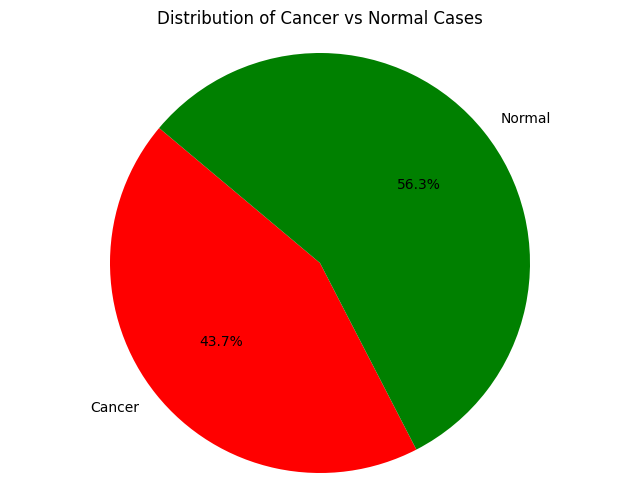

In [ ]:
# Train set
train_num_cancer = len(os.listdir(os.path.join(train_dir, 'cancer')))
train_num_normal = len(os.listdir(os.path.join(train_dir, 'normal')))

# Test set
test_num_cancer = len(os.listdir(os.path.join(test_dir, 'cancer')))
test_num_normal = len(os.listdir(os.path.join(test_dir, 'normal')))

# Join Train and Test
total_cancer = train_num_cancer + test_num_cancer
total_normal = train_num_normal + test_num_normal

# Pie Chart
labels = ['Cancer', 'Normal'] # Set Labels
sizes = [total_cancer, total_normal]
colors = ['red', 'green'] # Set Colors

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cancer vs Normal Cases')
plt.axis('equal')
plt.show()

**Class Distribution:**
- Jumlah distribusi yang tidak jauh berbeda pada cancer dan normal.
- 56.3% Merupakan klasifikasi Normal
- 43.7% Merupakan klasifikasi Cancer
- Data Slightly imbalanced

## What do the X-ray images of normal and cancerous bones look like in the data?

In [ ]:
# Function to get random sample images
def random_sample(image_files, num_samples=5):
  random_files= random.sample(image_files, num_samples)
  return random_files

In [ ]:
# Get random sample from Train for normal images
random_train_normal= random_sample(train_normal,num_samples=5)

# Get random sample from Train for cancer images
random_train_cancer= random_sample(train_cancer)

In [ ]:
# Function to show 5 random images of each class
def visualize_img(random_data, labels=None):
  fig, axes= plt.subplots(1,5, figsize=(15,12))
  for i, image_path in enumerate(random_data):
    image= plt.imread(image_path)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'{labels}, {image.shape}')
    axes[i].axis('off')
  plt.show()

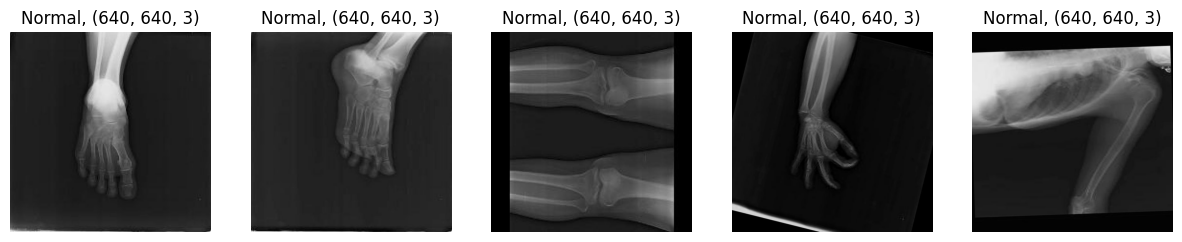

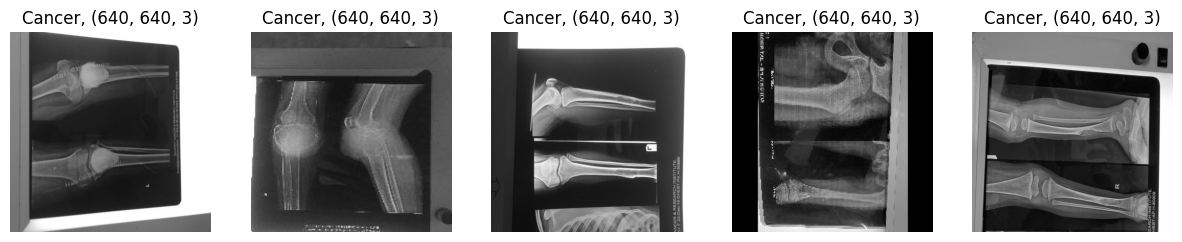

In [ ]:
# Random 5 image for Normal
visualize_img(random_train_normal, 'Normal')

# Random 5 image for Cancer
visualize_img(random_train_cancer, 'Cancer')

**Insight**:
- 5 gambar tulang yang masuk pada klasifikasi normal
- 5 gambar tulang yang masuk pada klasifikasi kanker
- Ukuran gambar sebesar 640x640 pixel
- Gambar memiliki 3 channel

# Feature Engineering

## Preprocessing

In [ ]:
# Image size settings
img_height= 225 # decreased image size for simplier model
img_width= 225
batch_size= 77

### Image Augmentation Combined

Found 7057 images belonging to 2 classes.
Found 882 images belonging to 2 classes.
Found 872 images belonging to 2 classes.


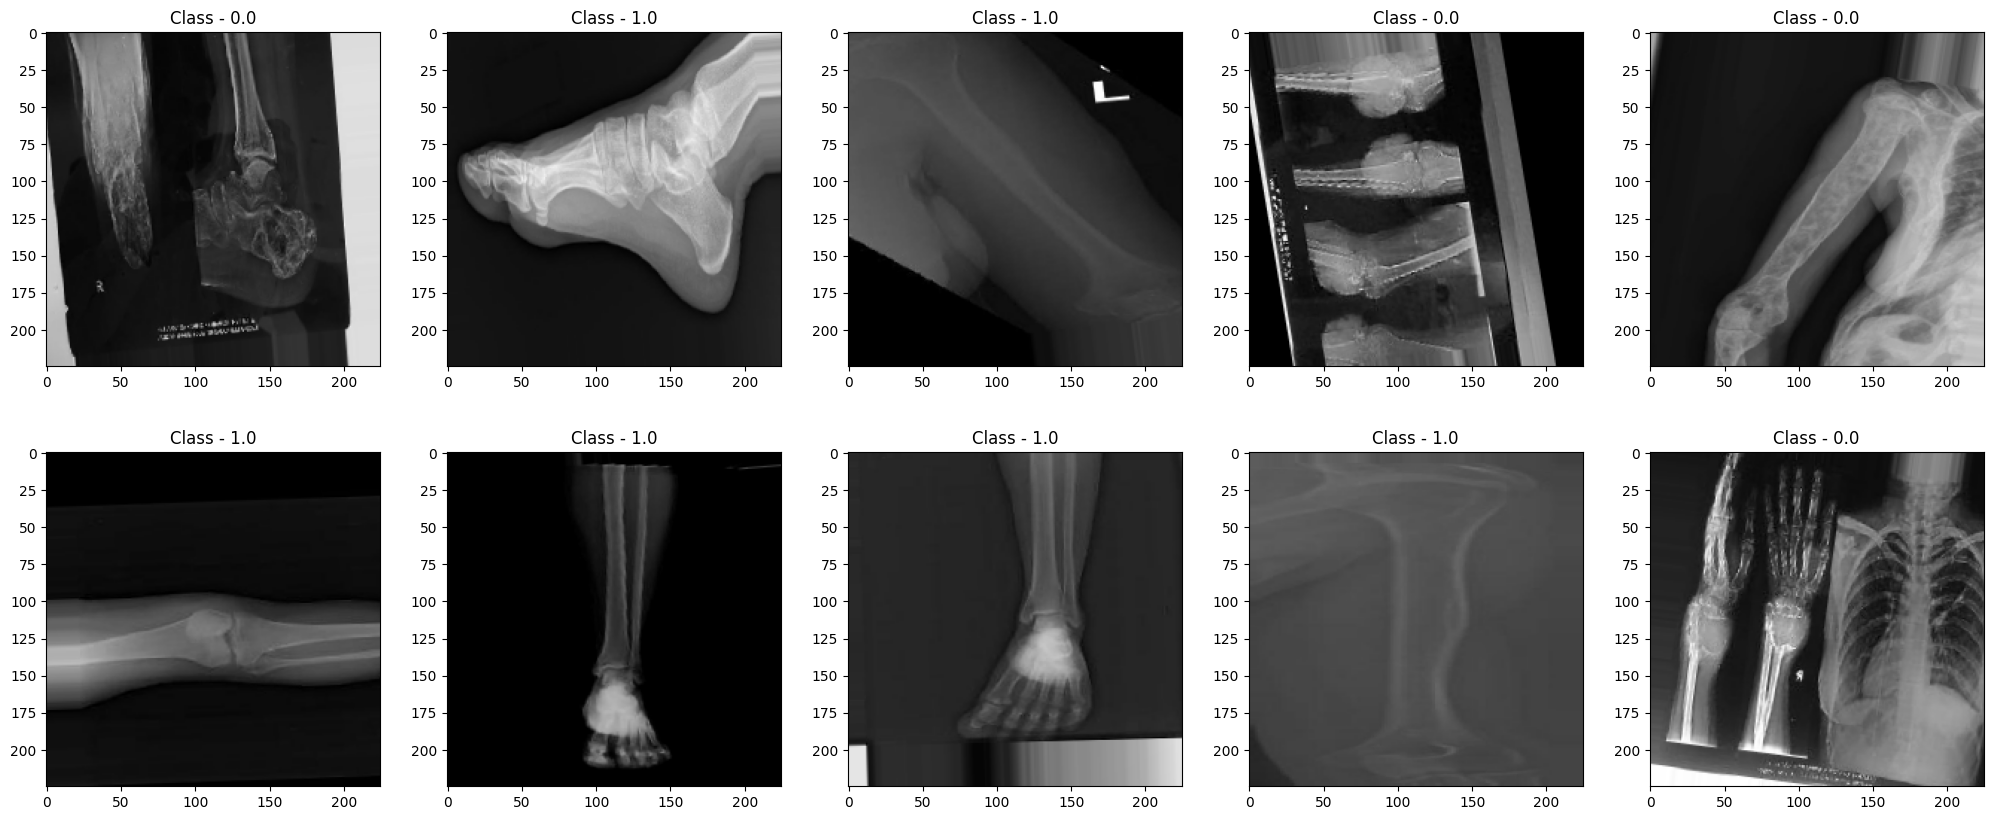

In [ ]:
# Data Augmentation - Combine all previous data augmentations
imgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,                   # Rescale pixel values to [0, 1]
    horizontal_flip=True,
    vertical_flip=False,              # False Vertical Flip for Medical Images
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=[0.9, 1.1],
    shear_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = imgen.flow_from_directory(
    train_dir,
    target_size=(225, 225), # same as prepro before, either 'img_heights' or input number
    class_mode='binary', # binary classification for this dataset
    shuffle=True,
    seed=2
)

val1 = imgen.flow_from_directory(
    val_dir,
    target_size=(225, 225),
    class_mode='binary',
    shuffle=False, # False shuffle for val set
    seed=2
)

test1 = test_datagen.flow_from_directory(
    test_dir,
    target_size=(225, 225),
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False,
    seed=2)

# Show images of train-set
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
n = 0

for i in range(2):
    for j in range(5):
        img = train1[0][0][n] * 255  # Rescale back for visualization
        img = img.astype('uint8')
        ax[i][j].imshow(img)
        ax[i][j].set_title('Class - ' + str(train1[0][1][n]))
        n += 1

plt.show()


**Insight**:
- Sample hasil gambar yang sudah diaugmentasi

In [ ]:
train1.class_indices

{'cancer': 0, 'normal': 1}

- Kelas Cancer direpresentasikan sebagai 0
- Kelas Normal direpresentasikan sebagai 1

# Model

## ANN - Sequential

## Model Definition and Training

In [ ]:
# Callback Settings with patience 3
callbacks1 = [
    EarlyStopping(monitor='val_loss', # monitoring val_loss
                  patience= 3) # threshold number of epoch for model to try
]

In [ ]:
# Set seeds for reproducibility
seed = 46
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

inputs = [img_height, img_width, 3]

# Clear any previous models
tf.keras.backend.clear_session()

# Initialize the model
model_adam = Sequential()

# Layer Conv 1
model_adam.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputs))
model_adam.add(MaxPooling2D(pool_size=2, strides=2))

# Layer Conv 2
model_adam.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the output
model_adam.add(Flatten())

# Fully connected layer
model_adam.add(Dense(units=128, activation='relu'))

# Output layer
model_adam.add(Dense(units=1, activation='sigmoid'))

# Summary of the model
model_adam.summary()

# Compile the model with Adam optimizer
model_adam.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['recall'])

# Train the model
history = model_adam.fit(train1, batch_size=100, epochs=20, validation_data=val1, callbacks=callbacks1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,949,281 (45.58 MB)

 Trainable params: 11,949,281 (45.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 104s 448ms/step - loss: 0.6129 - recall: 0.7221 - val_loss: 0.3502 - val_recall: 0.9091
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 140s 445ms/step - loss: 0.3577 - recall: 0.8872 - val_loss: 0.3614 - val_recall: 0.9814
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 142s 444ms/step - loss: 0.3197 - recall: 0.9071 - val_loss: 0.2723 - val_recall: 0.9153
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 143s 441ms/step - loss: 0.2851 - recall: 0.9020 - val_loss: 0.2751 - val_recall: 0.8719
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 140s 438ms/step - loss: 0.2633 - recall: 0.9070 - val_loss: 0.2885 - val_recall: 0.8450
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 102s 449ms/step - loss: 0.2599 - recall: 0.9102 - val_loss: 0.2720 - val_recall: 0.8347
Epoch 7/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 141s 440ms/step - loss: 0.2529 - recall: 0.8977 - val_loss: 0.2431 - val_recall: 0.8905
Epoch 8/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 101s 448ms/step - loss: 0.2461 - recall: 0.9072 - val_loss: 0.25

**Insight**
- Conv2D berguna untuk mengekstrak fitur fitur atau ciri ciri pada gambar
- MaxPooling dilakukan setelah Conv2D untuk melakukan downsampling pada fitur tanpa mengurangi informasi seperti PCA, digunakan untuk mengurangi resiko overfitting.
- Menggunakan fungsi aktivasi `Relu` dikarenakan fungsi tersebut merupakan fungsi yang efektif dan sederhana.
- Menggunakan Sigmoid dikarenakan data termasuk binary classification
- Menggunakan Binary Cross Entropy dikarenakan data yang termasuk pada binary classification
- Menggunakan metrics `Recall` dikarenakan data merupakan data medis, dimana meminimalisir nilai False Negativ sangat krusial.
- Meminimalisir kesalahan mendeteksi seperti model memprediksi pasien A tidak terkena kanker namun actualnya pasien A memiliki kanker. Kegunaan metrics ini adalah untuk mengurangi resiko tersebut.
- Menggunakan optimer Adam dikarenakan Adam sudah mengkombinasi 2 optimezer lainnya yaitu Momentum dan RMSprop

## Model Evaluation

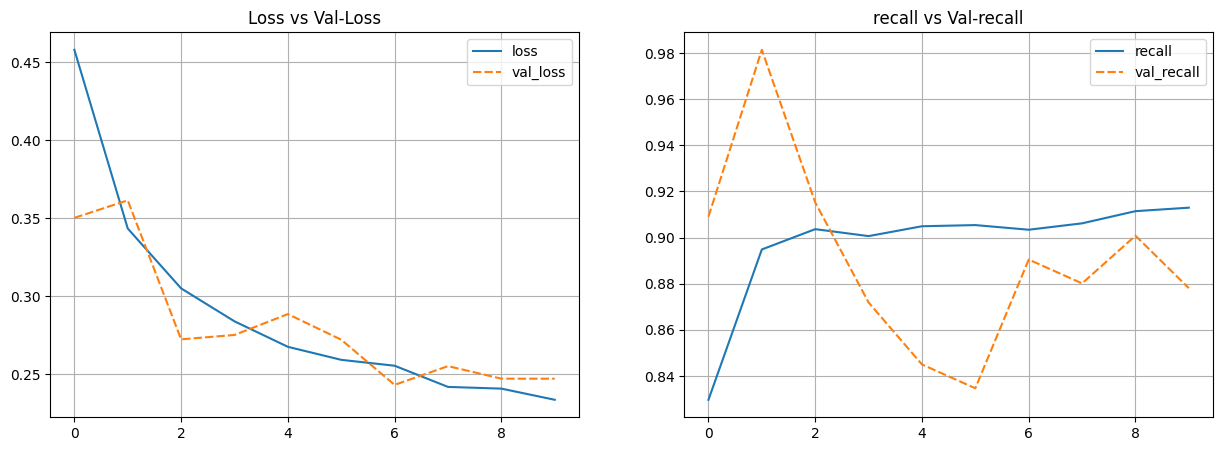

In [ ]:
# Plot Training Results

history_seq_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['recall', 'val_recall']])
plt.grid()
plt.title('recall vs Val-recall')
plt.show()

**Loss vs Val-Loss**:
- nilai loss yang semakin turun menunjukkan kinerja model yang meningkat
- Val-Loss juga turun mengikuti train
- Adanya kenaikan dan penurunan pada val-loss yang mengindikasikan model kurang baik saat melihat data baru

**Recall vs Val-Recall**:
- Nilai training recall yang naik menunjukkan kinerja model yang meningkat dalam mengidentifikasi True Positive
- Adanya fluktuasi atau naik turun pada val-recall yang mengindikasikan model tidak stabil saat melihat data baru

In [ ]:
test_results = model_adam.evaluate(test1, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Recall : {test_results[1]:.4f}')

Test Loss     : 0.2833
Test Recall : 0.8238


**Test Result**:
- Model dapat meminimalisir loss pada data test dengan baik
- Test Recall memiliki score 0.823 atau model dapat mengidentifikasi True Positive sebanyak 82.3% pada data.
- Dibutuhkan improvement agar model dapat mengidentifikasi sisa 17.6% data yang tidak dapat diidentifikasi sebelumnya

# Model Improvement

## ANN - Sequential - Improvement

## Model Definition and Training

In [ ]:
# Callback Settings
callbacks2 = [
    EarlyStopping(monitor='val_loss', # monitoring val_loss
                  patience= 5) # threshold number of epoch for model to try
]

In [ ]:
# Set seeds for reproducibility
seed = 46
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Input shape
inputs = [img_height, img_width, 3]

# Clear any previous models
tf.keras.backend.clear_session()

# Initialize the model
model_adam2 = Sequential()

# Layer Conv 1 with Batch Normalization
model_adam2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputs, kernel_regularizer=l2(0.0001)))
model_adam2.add(BatchNormalization())
model_adam2.add(MaxPooling2D(pool_size=2, strides=2))

# Layer Conv 2 with Batch Normalization
model_adam2.add(Conv2D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.0001)))
model_adam2.add(BatchNormalization())
model_adam2.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the output
model_adam2.add(Flatten())

# Fully connected layer with increased Dropout and regularization
model_adam2.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.0001)))
model_adam2.add(Dropout(0.4))

# Output layer
model_adam2.add(Dense(units=1, activation='sigmoid'))

# Summary of the model
model_adam2.summary()

# Compile the model with Adam optimizer and a custom learning rate
learning_rate = 0.0005
model_adam2.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['recall'])


# Train the model
history2 = model_adam2.fit(train1, batch_size=150, epochs=20, validation_data=val1,
                           callbacks=callbacks2) # use callbacks 2 with 5 patience settings


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 223, 223, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,949,473 (45.58 MB)

 Trainable params: 11,949,377 (45.58 MB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 110s 468ms/step - loss: 2.7296 - recall: 0.7873 - val_loss: 14.2201 - val_recall: 1.0000
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 99s 438ms/step - loss: 0.5518 - recall: 0.8731 - val_loss: 6.0189 - val_recall: 0.9959
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 143s 441ms/step - loss: 0.4054 - recall: 0.9014 - val_loss: 1.4069 - val_recall: 0.9897
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 98s 435ms/step - loss: 0.4389 - recall: 0.8892 - val_loss: 0.4281 - val_recall: 0.9959
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - loss: 0.4052 - recall: 0.9256 - val_loss: 0.7570 - val_recall: 0.5868
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 143s 437ms/step - loss: 0.3913 - recall: 0.8442 - val_loss: 0.3816 - val_recall: 0.8678
Epoch 7/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 140s 436ms/step - loss: 0.3769 - recall: 0.8565 - val_loss: 0.4056 - val_recall: 0.8471
Epoch 8/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 142s 438ms/step - loss: 0.4128 - recall: 0.8702 - val_loss: 0.378

**Insight**:
- Hampir semua parameter tidak jauh berbeda dengan model sebelumnya
- Penambahan parameter dropout, regularizer, dan learning rate
- Dropout merupakan parameter untuk mencegah overfitting dengan cara mematikan beberapa neuron saat proses pembelajaran
- Regularizer digunakan untuk memberikan penalti pada bobot atau weight model yang terlalu kompleks, ini membuat model lebih simple dan tidak terlalu kompleks.
- Learning rate digunakan untuk mengontrol seberapa besar perubahan yang dilakukan pada bobot model selama training. learning rate yang tepat dapat membuat model yang efisien dan stabil.


## Model Evaluation

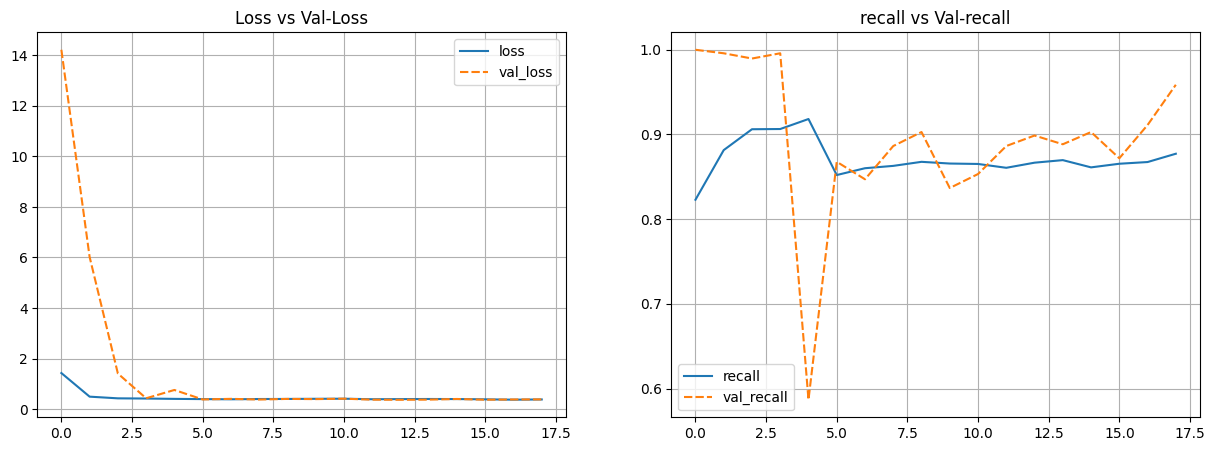

In [ ]:
# Plot Training Results

history_seq_df1 = pd.DataFrame(history2.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df1[['recall', 'val_recall']])
plt.grid()
plt.title('recall vs Val-recall')
plt.show()

**Loss vs Val-Loss**:
- Nilai loss dan val-loss yang stagnan, mengindikasikan model belajar dengan sangat cepat
- Nilai loss dan val-loss memiliki selisih yang tidak jauh berbeda menandakan adanya convergent

**Recall vs Val-Recall**:
- Training menunjukan model yang stabil
- Val-Recall mengalami penurunan dan kenaikan yang tajam pada saat awal. ini bisa terjadi karena model yang belum stabil atau dataset yang imbalance

In [ ]:
test_results3 = model_adam2.evaluate(test1, verbose=0)
print(f'Test Loss     : {test_results3[0]:.4f}')
print(f'Test Recall : {test_results3[1]:.4f}')

Test Loss     : 0.3354
Test Recall : 0.9139


**Test Result:**
- Model dapat meminimalisir loss pada test walaupun tidak sebagus model sebelumnya.
- Model dapat mengidentifikasi True Positive sebanyak 91.3% pada data.
- Improvment dari model sebelumnya yang hanya 82.3%
- Seiring dengan naiknya nilai recall, terjadi tradeoff antara loss dan nilai recall.
- Dikarenakan ini untuk kebutuhan medis, maka nilai recall dinilai lebih penting dibandingkan nilai loss yang tidak jauh berbeda dari model sebelumnya
- Dengan meminimalisir nilai False Negative, dimana lebih baik mendeteksi orang yang terkena kanker actualnya tidak dibandingkan mendeteksi orang tidak terkena kanker actualnya kanker.
- Model yang akan digunakan untuk saving ada model yang sudah dilakukannya improvement

# Model Saving

In [ ]:
model_adam2.trainable = False
model_adam2.save('model_adam2.keras')

# Model Inference

*Model Inference dilakukan pada notebook yang berbeda*

# Kesimpulan

1. Model memiliki performa yang baik pada recall setelah dilakukannya improvement
2. Namun nilai loss meningkat sesudah dilakukan improvement
3. Model dapat memprediksi True Positive sebesar 91.3% pada data validation, model berhasil meminimalisir nilai False Negative.
4. False Negative disini adalah dimana model memprediksi pasien A sebagai normal/cancer free namun actualnya pasien A terkena bone cancer.
5. Model masih termasuk kompleks dikarenakan komputasional yang dibutuhkan masih tinggi.

### Kelebihan Model:
1. Memiliki nilai recall yang sangat baik
2. Model mampu belajar dengan cepat dari data training

### Kekurangan Model
1. Adanya Fluktuasi pada recall validasi, Ini mungkin menandakan bahwa model kurang stabil atau ada overfitting pada saat training yang menyebabkan performa pada data validasi tidak konsisten.
2. Potensi Overfitting
3. Nilai Loss yang masih tinggi jika dibandingkan dengan model sebelumnya, menandakan model yang kurang konsisten dibandingkan dengan model awal
4. Dibutuhkan Improvement pada model dengan cara:
  - Tuning Regularisasi dan Learning Rate
  - Melakukan Tuning Data Augmentasi yang lebih dari sebelumnya
  - Mengurangi layer untuk mencegah overfitting
  - waktu dan computational resource yang lebih
